In [1]:
import vhdata
import utils
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as trans
from torch.utils.data import DataLoader
import more_trans
from functools import partial
from collections import deque
%matplotlib inline

In [2]:
def group_segments(indices):
    # [1,2,3,5,6,7] -> [(1,2,3),(5,6,7)]
    segments = []
    cur_segm = []
    for i in indices:
        if cur_segm and i > cur_segm[-1] + 1:
            segments.append(tuple(cur_segm))
            cur_segm = []
        cur_segm.append(i)
    if cur_segm:
        segments.append(tuple(cur_segm))
    return segments

def join_segments(grouped_indices, tol=2):
    # [(1,2,3),(5,6,7)] -> [(1,2,3,4,5,6,7)]
    q = deque([], maxlen=2)
    segments = []
    for segm in grouped_indices:
        q.append(segm)
        if len(q) == 2:
            s1, s2 = tuple(q)
            if min(s2) - max(s1) - 1 <= tol:
                gs = tuple(range(min(s1), max(s2) + 1))
                q.append(gs)
            else:
                segments.append(s1)
    if q:
        segments.append(q[-1])
    return segments

def summarize_segments(grouped_indices):
    # (1,2,3,4,5,6,7) -> (1,7)
    return map(lambda segm: (min(segm), max(segm)), grouped_indices)

# Video-8-8_0_0

In [51]:
dset = vhdata.VideoDataset(vhdata.prepare_dataset_root(8, (8,0,0)),
                           transform=more_trans.ToNumpy())
diffdset = vhdata.VideoDataset('CH08-08_00_00_diff',
                               transform=more_trans.ToNumpy())

In [52]:
def vf(fid):
    plt.close()
    plt.figure(figsize=(28, 8))
    plt.imshow(np.concatenate((dset[fid], diffdset[fid]), axis=1))

In [53]:
%%time
p = []
dataloader = DataLoader(diffdset, batch_size=100, shuffle=False)
for dframes in dataloader:
    p.append(np.percentile(dframes, axis=(1,2,3), q=90))
p = np.concatenate(p)

CPU times: user 4min 41s, sys: 10.2 s, total: 4min 51s
Wall time: 4min 51s


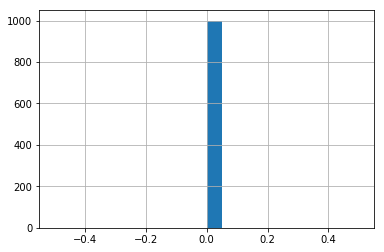

In [54]:
plt.hist(p[p<0.05], bins=20)
plt.grid()

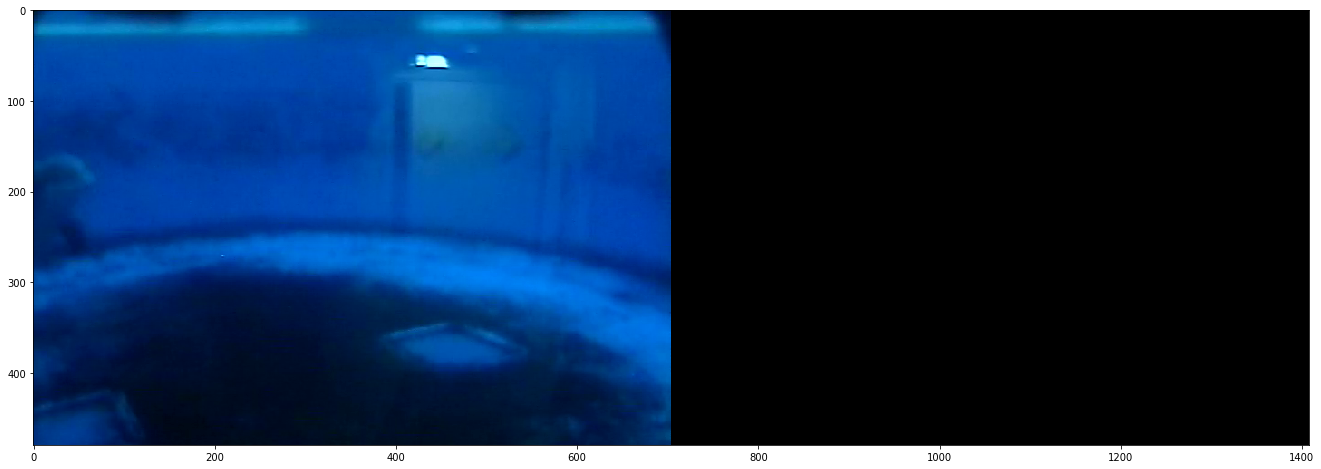

In [55]:
vf(15)

In [ ]:
dset.close()
diffdset.close()

# Video-9-8_0_0

In [33]:
dset = vhdata.VideoDataset(vhdata.prepare_dataset_root(9, (8,0,0)),
                           transform=trans.Compose([
                               more_trans.ToNumpy(),
                               more_trans.ResetChannelNumpy(0)]))
diffdset = vhdata.VideoDataset('CH09-08_00_00_diff',
                               transform=trans.Compose([
                                   more_trans.ToNumpy(),
                                   more_trans.ResetChannelNumpy(0)]))

In [18]:
def vf(fid):
    plt.close()
    plt.figure(figsize=(28, 8))
    plt.imshow(np.concatenate((dset[fid], diffdset[fid]), axis=1))

In [34]:
%%time
p = []
dataloader = DataLoader(diffdset, batch_size=100, shuffle=False)
for dframes in dataloader:
    p.append(np.percentile(dframes, axis=(1,2,3), q=90))
p = np.concatenate(p)

CPU times: user 6min 2s, sys: 11 s, total: 6min 13s
Wall time: 6min 13s


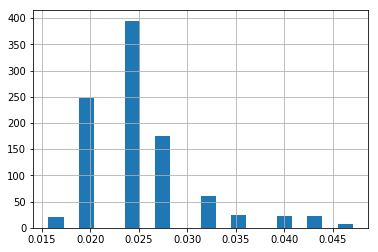

In [35]:
plt.hist(p[p<0.05], bins=20)
plt.grid()

In [36]:
# sufficiently yet not necessarily get video clips with/without dolphins
dpind = np.where(p >= 0.03)[0]
paind = np.where(p <= 0.02)[0]

In [37]:
da_segments = group_segments(paind)
da_segments = filter(lambda x: len(x) > 4, da_segments)
da_segments = join_segments(da_segments)
da_segments = summarize_segments(da_segments)
dp_segments = group_segments(dpind)
dp_segments = filter(lambda x: len(x) > 4, dp_segments)
dp_segments = join_segments(dp_segments)
dp_segments = summarize_segments(dp_segments)
print 'len(da):', len(da_segments)
print 'len(dp):', len(dp_segments)

len(da): 6
len(dp): 11


In [38]:
print 'da:', da_segments  # (d)olphin (a)bsent video clips
print 'dp:', dp_segments  # (d)olphin (p)resent video clips

da: [(252, 298), (372, 406), (570, 580), (906, 910), (930, 946), (954, 982)]
dp: [(1, 19), (61, 65), (191, 195), (201, 207), (211, 219), (223, 229), (237, 245), (327, 343), (359, 366), (483, 489), (515, 554)]


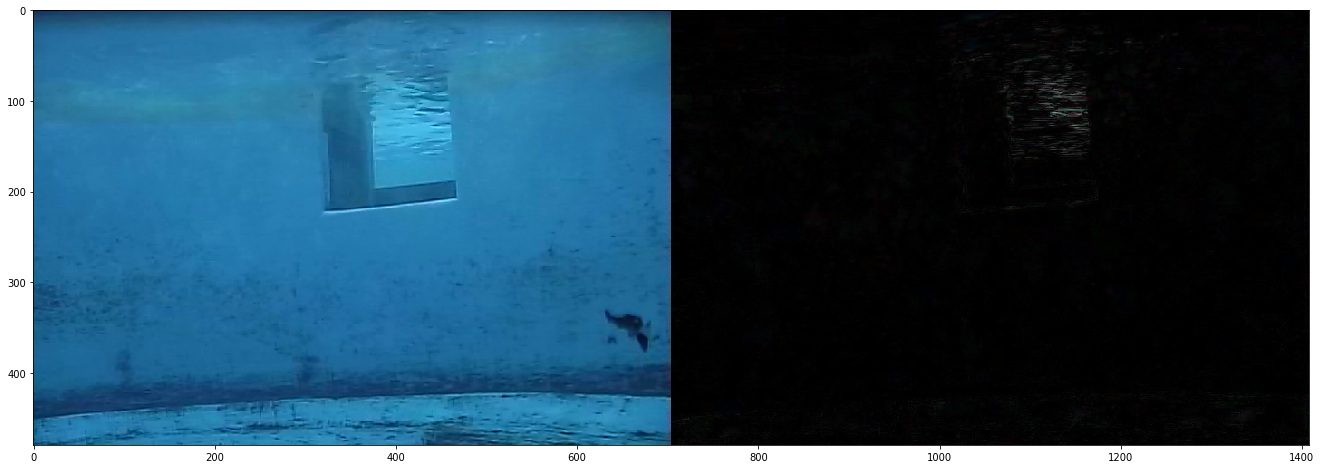

In [39]:
vf(262)

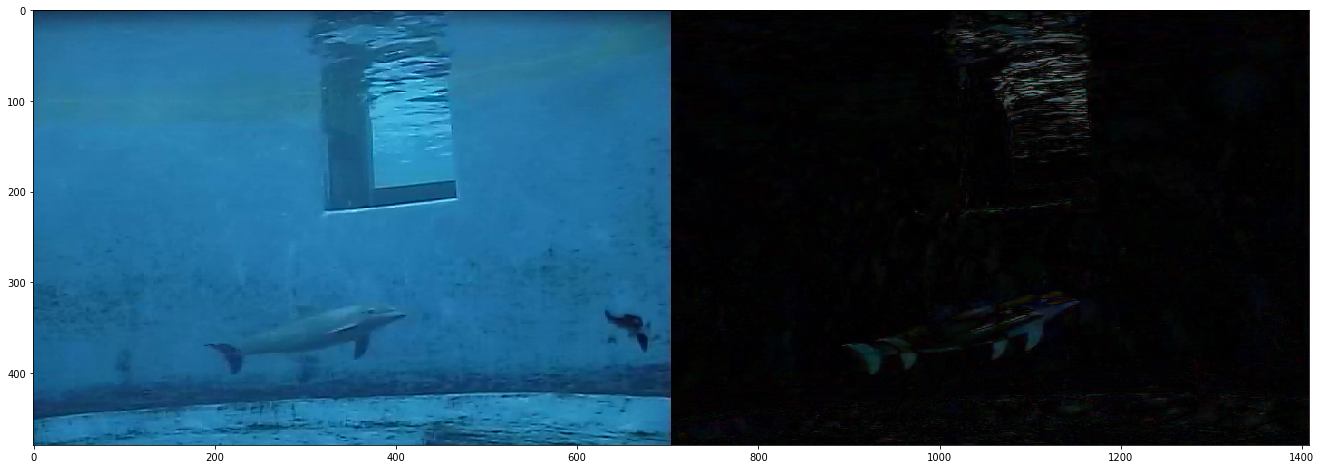

In [40]:
vf(515)

In [ ]:
dset.close()
diffdset.close()